In [1]:
#import library
import numpy as np
import pandas as pd
import copy
import math
import random as r
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
data2 = pd.read_csv('salju_train.csv') 

# data exploration

In [4]:
#number of record and coloumns
data2.shape

(109095, 24)

In [5]:
data2.describe #statisktik

<bound method NDFrame.describe of             id     Tanggal KodeLokasi  SuhuMin  SuhuMax  Hujan  Penguapan  \
0            1  01/06/2014         C4     10.4     15.5    4.8        NaN   
1            2  15/07/2014        C10      9.0     17.0    8.0        2.6   
2            3  16/02/2011        C46     18.2     32.0    0.0        NaN   
3            4  08/08/2012        C36      7.3     24.5    0.0        8.4   
4            5  29/10/2016         C7      5.9     20.3    0.0        3.6   
...        ...         ...        ...      ...      ...    ...        ...   
109090  109091  31/01/2009        C38     20.1     23.7    0.0        7.2   
109091  109092  03/11/2010        C16     15.7     25.2    0.0        NaN   
109092  109093  11/11/2010        C17      7.5     20.4    1.6        NaN   
109093  109094  16/04/2012        C11     10.8     29.8    0.0        7.8   
109094  109095  09/10/2011        C16     12.3     27.4    9.0        NaN   

        SinarMatahari ArahAnginTerkencang

In [6]:
#datatype for each coloumns
data2.dtypes

id                            int64
Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                object
dtype: object

In [7]:
#typedata numeric for each columns
data2._get_numeric_data().columns

Index(['id', 'SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari',
       'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm',
       'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am',
       'Awan3pm', 'Suhu9am', 'Suhu3pm'],
      dtype='object')

<AxesSubplot:>

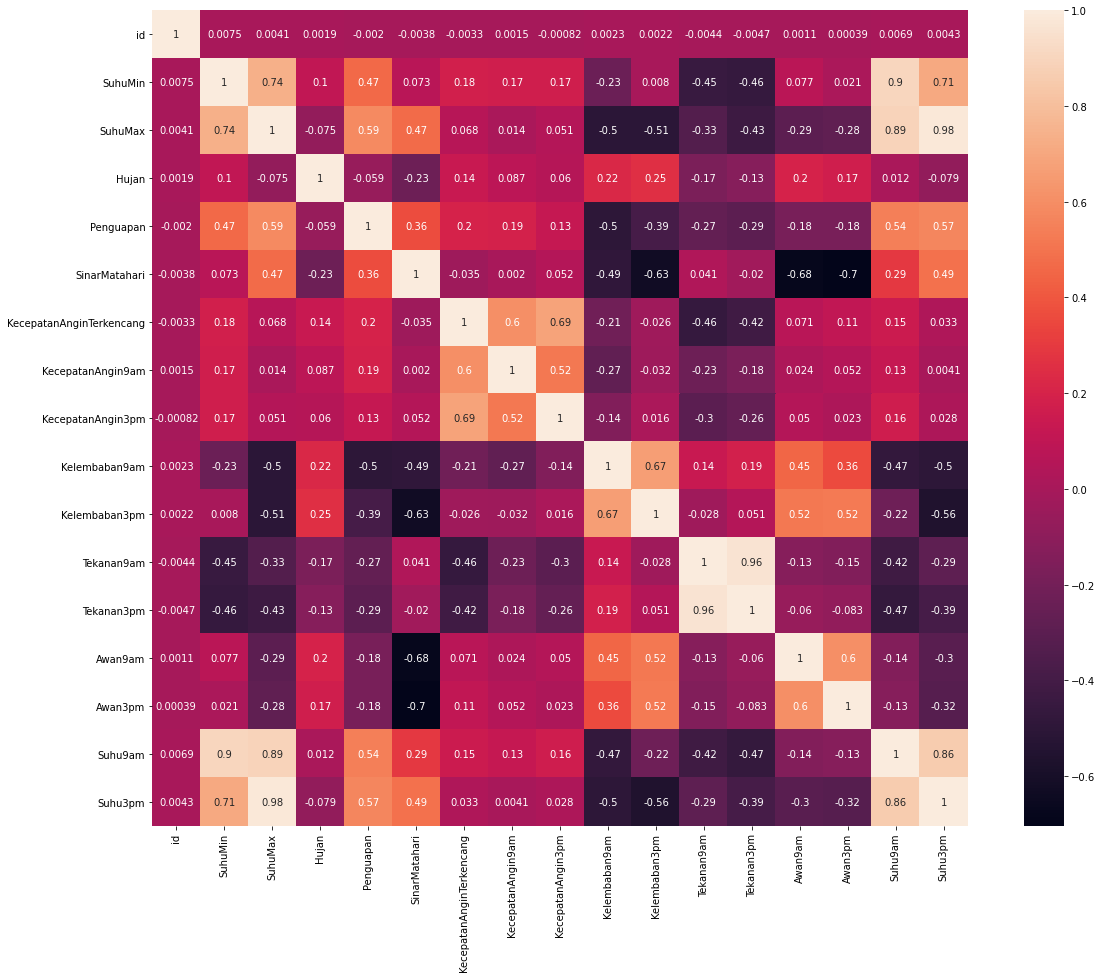

In [8]:
#correlations
corrheatmap = data2.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrheatmap, annot=True, square=True)

In [9]:
#missing value 
data2.fillna(data2.mean(), inplace=True)
data2 = data2.fillna(data2.mode().iloc[0])

data2.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,5.46244,7.599527,WSW,24.000000,...,78.0,76.0,1020.10000,1018.500000,4.450893,4.51614,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.60000,7.400000,W,40.032002,...,80.0,61.0,1015.20000,1014.600000,7.000000,5.00000,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,5.46244,7.599527,ESE,44.000000,...,62.0,42.0,1017.64708,1015.253117,4.450893,4.51614,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.40000,10.400000,SSW,54.000000,...,25.0,17.0,1019.20000,1016.900000,1.000000,7.00000,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.60000,12.600000,N,37.000000,...,55.0,48.0,1019.70000,1014.700000,2.000000,6.00000,12.4,18.1,Tidak,Tidak


In [31]:
#choose attribute
df = data2[['SuhuMin', 'SuhuMax', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Suhu9am', 'Suhu3pm']]
df.head()

,SuhuMin,SuhuMax,KecepatanAngin9am,KecepatanAngin3pm,Suhu9am,Suhu3pm
0,10.4,15.5,0.0,13.0,13.1,15.0
1,9.0,17.0,13.0,20.0,11.9,15.5
2,18.2,32.0,15.0,26.0,23.8,29.6
3,7.3,24.5,13.0,19.0,15.3,23.2
4,5.9,20.3,22.0,19.0,12.4,18.1


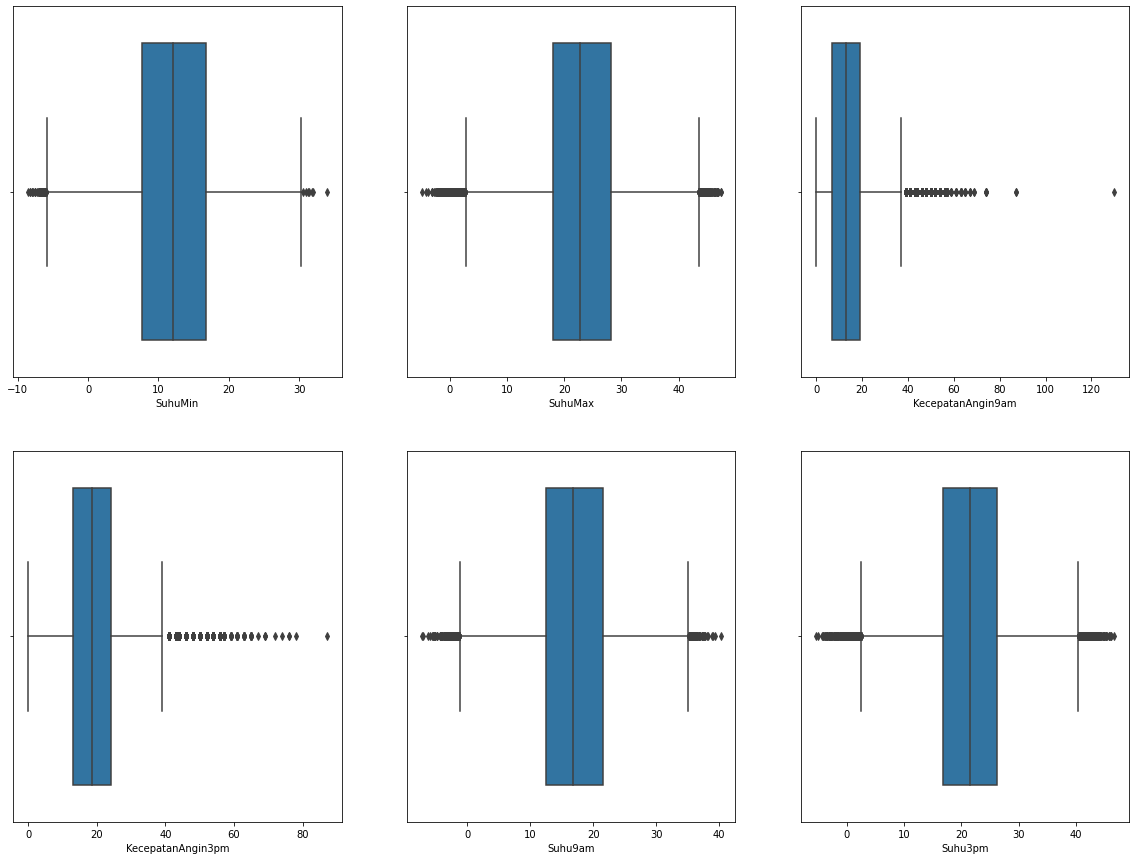

In [11]:
#finding outlier
data2_f = data2.iloc[:,[3,4,12,13,20,21]]
data2_f.columns

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,15))

for i, ax in zip(data2_f.columns, axes.flat):
    sns.boxplot(x=data2_f[i],ax=ax)
plt.show()

<AxesSubplot:xlabel='ArahAnginTerkencang', ylabel='count'>

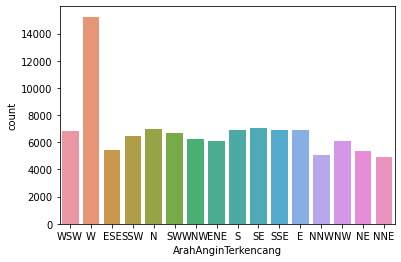

In [12]:
#number of occurrences of same
sns.countplot(x = 'ArahAnginTerkencang', data = data2)

<AxesSubplot:xlabel='ArahAngin9am', ylabel='count'>

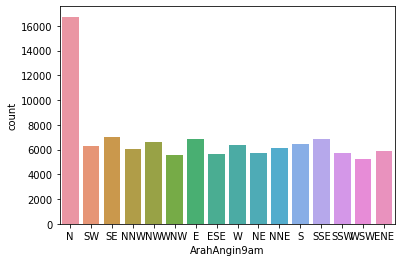

In [13]:
sns.countplot(x = 'ArahAngin9am', data = data2)

<AxesSubplot:xlabel='ArahAngin3pm', ylabel='count'>

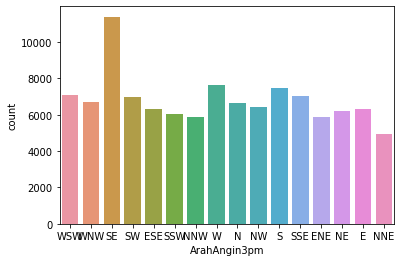

In [14]:
sns.countplot(x = 'ArahAngin3pm', data = data2)

<AxesSubplot:xlabel='BersaljuHariIni', ylabel='count'>

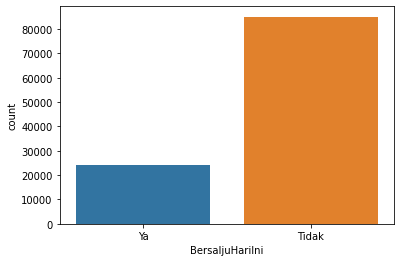

In [15]:
sns.countplot(x = 'BersaljuHariIni', data = data2)

<AxesSubplot:xlabel='BersaljuBesok', ylabel='count'>

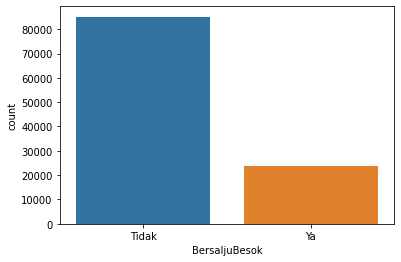

In [16]:
sns.countplot(x = 'BersaljuBesok', data = data2)

<Figure size 7200x7200 with 0 Axes>

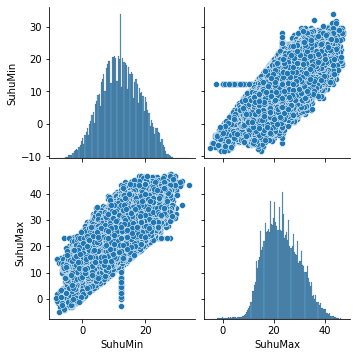

In [27]:
plt.figure(figsize=(100, 100))
df_core= data2[data2['SuhuMin'].notnull()]
g = sns.pairplot(df_core[['SuhuMin', 'SuhuMax']] )

<Figure size 7200x7200 with 0 Axes>

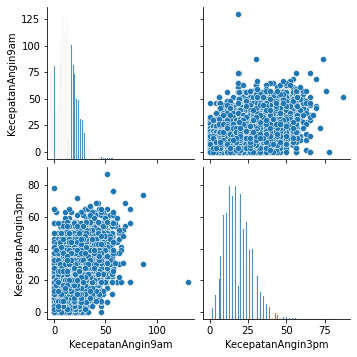

In [28]:
plt.figure(figsize=(100, 100))
df_core= data2[data2['KecepatanAngin9am'].notnull()]
g = sns.pairplot(df_core[['KecepatanAngin9am', 'KecepatanAngin3pm']] )

<Figure size 7200x7200 with 0 Axes>

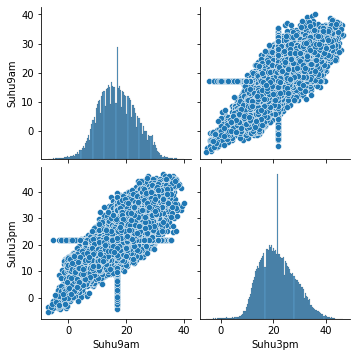

In [29]:
plt.figure(figsize=(100, 100))
df_core= data2[data2['Suhu9am'].notnull()]
g = sns.pairplot(df_core[['Suhu9am', 'Suhu3pm']] )

In [33]:
#scaling data
scaler = MinMaxScaler()

data2_f.iloc[0:len(data2_f),[0,1,2,3,4,5]] = scaler.fit_transform(data2_f.iloc[0:len(data2_f),[0,1,2,3,4,5]])
data2_f.head()

c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,SuhuMin,SuhuMax,KecepatanAngin9am,KecepatanAngin3pm,Suhu9am,Suhu3pm
0,0.445755,0.389635,0.000000,0.149425,0.428270,0.391555
1,0.412736,0.418426,0.100000,0.229885,0.402954,0.401152
2,0.629717,0.706334,0.115385,0.298851,0.654008,0.671785
3,0.372642,0.562380,0.100000,0.218391,0.474684,0.548944
4,0.339623,0.481766,0.169231,0.218391,0.413502,0.451056


In [36]:
# data2_f.to_csv("C:/Users/DelvanitaSW/Manlin/data.csv", sep=',',index=False, encoding='utf-8')

# clustering

In [37]:
def euclidian(u, v):
    return sum((p-q)**2 for p, q in zip(u, v))**0.5

# experimen 1

In [38]:
def kmeans(n_neighbour, n_feat, centroids):
    #perform k-means algorithm until all centroid point has same value
    while (True):
        cluster = []

        for i in range(len(X)):
            euclid = []
            #calculate euclidian distance
            for l in range(0, n_neighbour):
                euclid.append(euclidian(X[i][:n_feat],centroids[l]))
            #select cluster from minimum euclidean
            idx = np.argmin(euclid)
            cluster.append(idx+1)
            #add cluster to X
            X[i][n_feat] = idx+1

        #clustering the centroids
        group = {}
        for j in set(cluster):
            group[j] = [i for i in range(len(cluster)) if cluster[i] == j]
    
        #store centroid information of each cluster
        dataX = {}
        for j in range(1,n_neighbour+1):
            dataX[j] = [X[group[j][i]][:n_feat] for i in range(len(group[j]))]
        
        #assign new centroids to each cluster
        new_centroids = []
        for l in range(1,n_neighbour+1):
            new_centroids.append(np.mean(dataX[l], axis=0).tolist())
        
        if (centroids == new_centroids):
            return centroids
#             break
        
        centroids = copy.copy(new_centroids)

In [39]:
kn = [2,3,4,5,7]
sil = []

#perform silhoutte metrics for each kmeans clustering with different k in feature manufacturer and price
for k in kn:
    X = df[['SuhuMin','SuhuMax']]
    X['cluster'] = 0
    X = X.values.tolist()
    n_feat = 2
    centroids = []
    for i in range(k):
        rand = np.random.randint(0, len(X)-1)
        centroids.append(X[rand][:n_feat])
    km = kmeans(k, n_feat, centroids)
    xy = pd.DataFrame(data=X)
    sc = silhouette_score(xy.iloc[:,[0,1]], xy[2], metric = 'euclidean')
    sil.append(sc)

c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

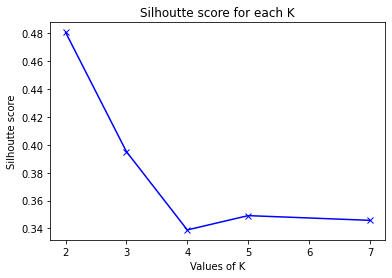

In [40]:
plt.plot(kn, sil, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Silhoutte score') 
plt.title('Silhoutte score for each K') 
plt.show()

In [41]:
X = df[['SuhuMin','SuhuMax']]
X['cluster'] = 0
X = X.values.tolist()
k = 4
n_feat = 2
centroids = []
for i in range(k):
    rand = np.random.randint(0, len(X)-1)
    centroids.append(X[rand][:n_feat])
km = kmeans(k, n_feat, centroids)

c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


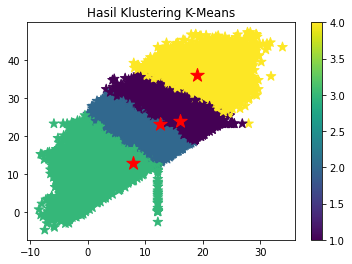

In [47]:
X = np.array(X)
xy = pd.DataFrame(data=X)
output = plt.scatter(X[:,0], X[:,1], s = 100, c = xy[2], marker = '*', alpha = 1, )
centers = np.array(centroids)
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='*');
plt.title('Hasil Klustering K-Means')
plt.colorbar (output)
plt.show()

In [62]:
score = silhouette_score(xy.iloc[:,[0,n_feat-1]], xy[n_feat], metric = 'euclidean')
score

0.37176850222109276

# experimen 2

In [48]:
kn = [2,3,4,5,7]
sil = []

#perform silhoutte metrics for each kmeans clustering with different k in feature manufacturer and price
for k in kn:
    X = df[['KecepatanAngin9am','KecepatanAngin3pm']]
    X['cluster'] = 0
    X = X.values.tolist()
    n_feat = 2
    centroids = []
    for i in range(k):
        rand = np.random.randint(0, len(X)-1)
        centroids.append(X[rand][:n_feat])
    km = kmeans(k, n_feat, centroids)
    xy = pd.DataFrame(data=X)
    sc = silhouette_score(xy.iloc[:,[0,1]], xy[2], metric = 'euclidean')
    sil.append(sc)

c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

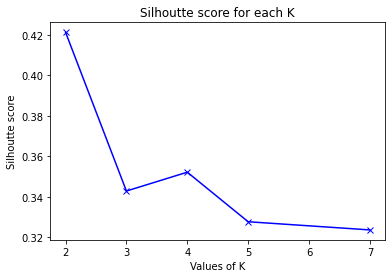

In [49]:
plt.plot(kn, sil, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Silhoutte score') 
plt.title('Silhoutte score for each K') 
plt.show()

In [67]:
X = df[['KecepatanAngin9am','KecepatanAngin3pm']]
X['cluster'] = 0
X.head()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = X.tolist()
k = 2
n_feat = 2
centroids = []
for i in range(k):
    rand = np.random.randint(0, len(X)-1)
    centroids.append(X[rand][:n_feat])
km = kmeans(k, n_feat, centroids)

c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


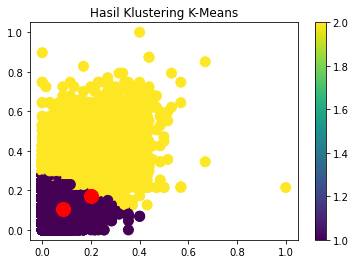

In [68]:
X = np.array(X)
xy = pd.DataFrame(data=X)
output = plt.scatter(X[:,0], X[:,1], s = 100, c = xy[2], marker = 'o', alpha = 1, )
centers = np.array(centroids)
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='o');
plt.title('Hasil Klustering K-Means')
plt.colorbar (output)
plt.show()

In [69]:
score = silhouette_score(xy.iloc[:,[0,n_feat-1]], xy[n_feat], metric = 'euclidean')
score

0.4360922334365307

# experimen 3

In [52]:
kn = [2,3,4,5,7]
sil = []

#perform silhoutte metrics for each kmeans clustering with different k in feature manufacturer and price
for k in kn:
    X = df[['Suhu9am','Suhu3pm']]
    X['cluster'] = 0
    X = X.values.tolist()
    n_feat = 2
    centroids = []
    for i in range(k):
        rand = np.random.randint(0, len(X)-1)
        centroids.append(X[rand][:n_feat])
    km = kmeans(k, n_feat, centroids)
    xy = pd.DataFrame(data=X)
    sc = silhouette_score(xy.iloc[:,[0,1]], xy[2], metric = 'euclidean')
    sil.append(sc)

c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

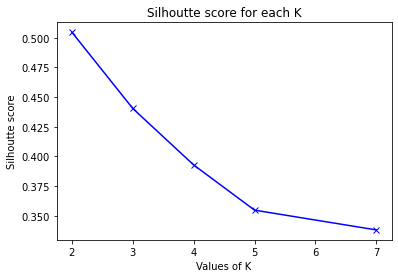

In [53]:
plt.plot(kn, sil, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Silhoutte score') 
plt.title('D for each K') 
plt.show()

In [71]:
X = df[['Suhu9am','Suhu3pm']]
X['cluster'] = 0
X.head()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = X.tolist()
k = 3
n_feat = 2
centroids = []
for i in range(k):
    rand = np.random.randint(0, len(X)-1)
    centroids.append(X[rand][:n_feat])
km = kmeans(k, n_feat, centroids)

c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


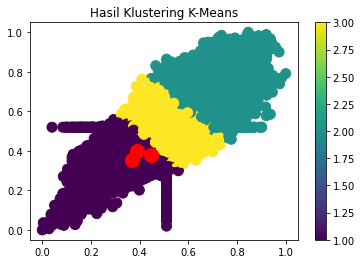

In [74]:
X = np.array(X)
xy = pd.DataFrame(data=X)
output = plt.scatter(X[:,0], X[:,1], s = 100, c = xy[2], marker = 'o', alpha = 1, )
centers = np.array(centroids)
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='o');
plt.title('Hasil Klustering K-Means')
plt.colorbar (output)
plt.show()

In [73]:
score = silhouette_score(xy.iloc[:,[0,n_feat-1]], xy[n_feat], metric = 'euclidean')
score

0.4400815882977956

# EKSPERIMEN 4

In [61]:
kn = [2,3,4,5,7]
sil = []

#perform silhoutte metrics for each kmeans clustering with different k in feature manufacturer and price
for k in kn:
    X = df[['Suhu9am','SuhuMin']]
    X['cluster'] = 0
    X = X.values.tolist()
    n_feat = 2
    centroids = []
    for i in range(k):
        rand = np.random.randint(0, len(X)-1)
        centroids.append(X[rand][:n_feat])
    km = kmeans(k, n_feat, centroids)
    xy = pd.DataFrame(data=X)
    sc = silhouette_score(xy.iloc[:,[0,1]], xy[2], metric = 'euclidean')
    sil.append(sc)

c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

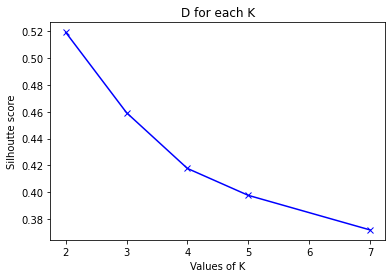

In [70]:
plt.plot(kn, sil, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Silhoutte score') 
plt.title('D for each K') 
plt.show()

In [75]:
X = df[['Suhu9am','Suhu3pm']]
X['cluster'] = 0
X.head()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = X.tolist()
k = 4
n_feat = 2
centroids = []
for i in range(k):
    rand = np.random.randint(0, len(X)-1)
    centroids.append(X[rand][:n_feat])
km = kmeans(k, n_feat, centroids)

c:\users\delvanitasw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


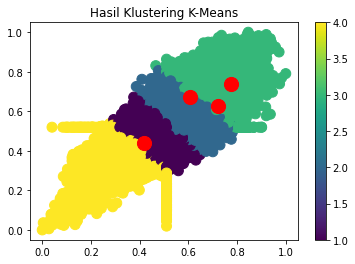

In [76]:
X = np.array(X)
xy = pd.DataFrame(data=X)
output = plt.scatter(X[:,0], X[:,1], s = 100, c = xy[2], marker = 'o', alpha = 1, )
centers = np.array(centroids)
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='o');
plt.title('Hasil Klustering K-Means')
plt.colorbar (output)
plt.show()

In [77]:
score = silhouette_score(xy.iloc[:,[0,n_feat-1]], xy[n_feat], metric = 'euclidean')
score

0.39250945585456787